In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import joblib


In [21]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')


In [22]:
true_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [23]:
fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [26]:
# Create unified dataset
true_df["label"] = "REAL"
fake_df["label"] = "FAKE"

In [27]:
#suffle
df = pd.concat([true_df, fake_df]).reset_index(drop=True)
df = df.sample(frac=1, random_state=42) 

In [29]:
# Check shape
print("Dataset shape:", df.shape)
print(df.label.value_counts())

Dataset shape: (44898, 5)
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


In [30]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [36]:
pipelines = {}

for name, model in models.items():
    pipelines[name] = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english", max_df=0.7)),
        ("clf", model),
    ])


In [37]:
results = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    results[name] = acc

print("\n All models evaluated")



Training Logistic Regression...
Accuracy for Logistic Regression: 0.9850
              precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4696
        REAL       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.99      0.98      0.98      8980


Training Decision Tree...
Accuracy for Decision Tree: 0.9955
              precision    recall  f1-score   support

        FAKE       1.00      0.99      1.00      4696
        REAL       0.99      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Training Random Forest...
Accuracy for Random Forest: 0.9886
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4696
        REAL       0.99      0.99      

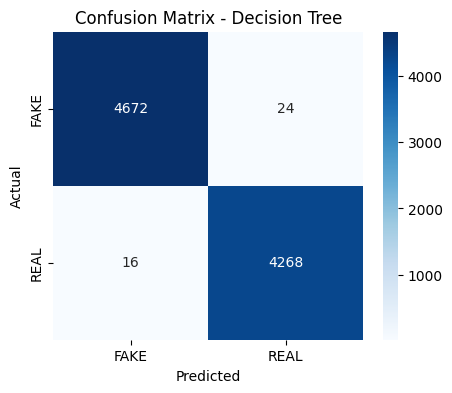

In [51]:
from sklearn.metrics import confusion_matrix

# Predict using best model
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=["FAKE","REAL"])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["FAKE","REAL"], yticklabels=["FAKE","REAL"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [41]:
best_model_name = max(results, key=results.get)
best_model = pipelines[best_model_name]

print(f"\n Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# ====== 7) Save Best Model & TF‑IDF ======

joblib.dump(best_model, "fake_news_model.pkl")
print("Saved model to fake_news_model.pkl")


🥇 Best model: Decision Tree with accuracy 0.9955
Saved model to fake_news_model.pkl


/var/folders/c6/8q02d72n1zdch15053xpb1hw0000gn/T/ipykernel_14077/3985818560.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


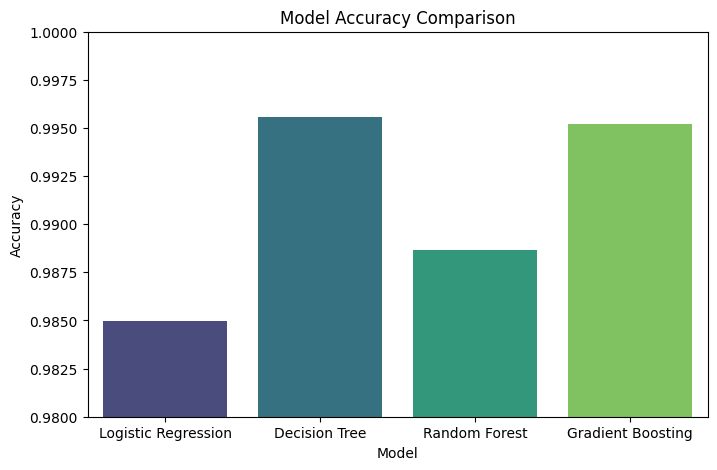

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.ylim(0.98, 1)  # focus on high accuracy
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


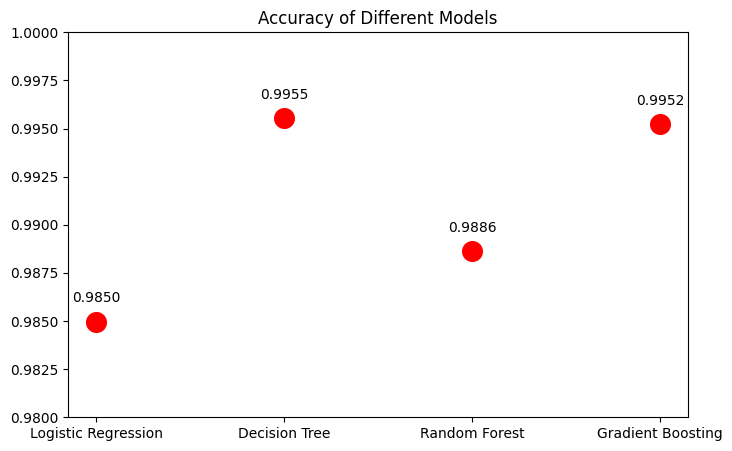

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(results_df["Model"], results_df["Accuracy"], s=200, color="red")
for i, acc in enumerate(results_df["Accuracy"]):
    plt.text(i, acc+0.001, f"{acc:.4f}", ha="center")
plt.title("Accuracy of Different Models")
plt.ylim(0.98, 1)
plt.show()
